Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

    The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

    Attribute Information:
    The explanations of sensor measurements and their brief statistics are given below.
    
    Variable (Abbr.) Unit Min Max Mean
    Ambient temperature (AT) C â€“6.23 37.10 17.71
    Ambient pressure (AP) mbar 985.85 1036.56 1013.07
    Ambient humidity (AH) (%) 24.08 100.20 77.87
    Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
    Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
    Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
    Turbine after temperature (TAT) C 511.04 550.61 546.16
    Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
    Turbine energy yield (TEY) MWH 100.02 179.50 133.51
    Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
    Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

### Importing the required Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold

from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# importing warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset

In [2]:
# Reading the dataset
gas = pd.read_csv("gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
# to check the null values of the data
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
print("Dimensions -",gas.shape)
print("Column names -",gas.columns)

Dimensions - (15039, 11)
Column names - Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')


In [6]:
# to check the dimensions of duplicates in the data
gas[gas.duplicated()].shape

(0, 11)

#### Checking for Outliers

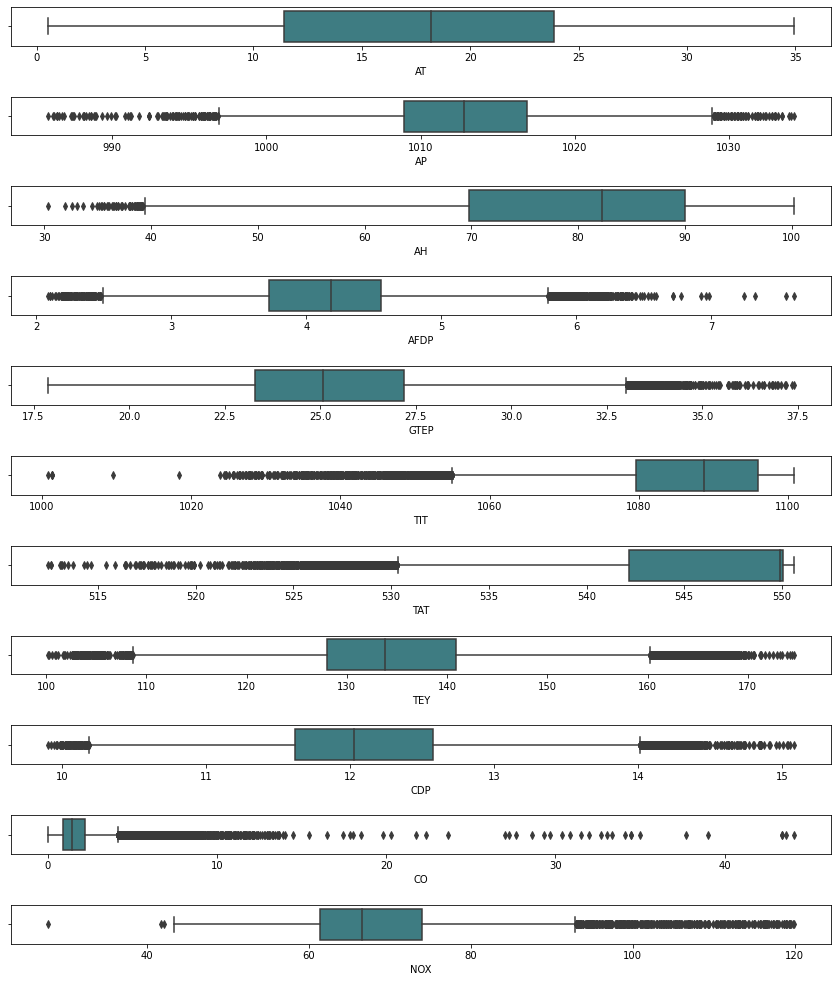

In [7]:
# checking for the Outliers in the variables if present
outlier = gas.copy() 
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

Since there are many outliers in the data, we cannot drop them as they may provide important information.

In [8]:
# to change TEY column as the first column
gas1 = gas.copy()
gas1.insert(0, 'T_E_Y', gas1.iloc[:,7])
gas1 = gas1.drop(gas1.columns[[8]], axis=1)
gas1.head()

,T_E_Y,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


### Standardization

In [9]:
# standardizing the data using StandardScaler function
scaler = StandardScaler()

gas_std = scaler.fit_transform(gas1)
gas_std = pd.DataFrame(scaler.transform(gas1),columns=gas1.columns)
gas_std.head()

,T_E_Y,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.231172,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.229909,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.230541,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.229909,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.229909,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591


### Train and Test Split
    Splitting the data into Train and Test data

In [10]:
X = gas_std.drop(['T_E_Y'],axis=1)
y = gas_std[['T_E_Y']]

# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=3)

### Tuning of Hyperparameters 

    Batch Size and Epochs

In [11]:
# creating the model
def create_model():
    model_1 = Sequential()
    model_1.add(Dense(32,input_dim=10,activation='relu'))
    model_1.add(Dense(64,activation='relu'))
    model_1.add(Dense(32,activation="relu"))
    model_1.add(Dense(64,activation="relu"))
    model_1.add(Dense(32,activation="relu"))
    model_1.add(Dense(32,activation="relu"))
    model_1.add(Dense(64,activation="relu"))
    model_1.add(Dense(64,activation="relu"))
    model_1.add(Dense(units=1,activation="linear"))
    
    adam = Adam(learning_rate=0.01)
    model_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=["MAE"])
    return model_1
    

# Create the model
# KerasRegressor() is used here as we want to predict TEY variable based on all the other features
model_1 = KerasRegressor(build_fn=create_model, verbose=0)
# Defining the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)
# Building and fitting the GridSearchCV
grid = GridSearchCV(estimator=model_1, param_grid=param_grid, 
                    cv=KFold(), verbose=10)
grid_result1 = grid.fit(X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.998 total time=   4.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.997 total time=   3.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.992 total time=   3.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.997 total time=   3.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.997 total time=   3.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [12]:
# Summarizing the results
print('Best {}, using {}'.format(grid_result1.best_score_, grid_result1.best_params_))
means  = grid_result1.cv_results_["mean_test_score"]
stds   = grid_result1.cv_results_["std_test_score"]
params = grid_result1.cv_results_["params"]
for mean,stdev,param in zip(means, stds,params):
    print("{}, {} with {}".format(mean, stdev, param))

Best 0.9985319436087394, using {'batch_size': 20, 'epochs': 100}
0.9963873681141362, 0.002056734581691622 with {'batch_size': 10, 'epochs': 10}
0.9982587871854427, 0.0001387564918594208 with {'batch_size': 10, 'epochs': 50}
0.9982756969085609, 0.0006718899585158126 with {'batch_size': 10, 'epochs': 100}
0.997247230052982, 0.000805200287200976 with {'batch_size': 20, 'epochs': 10}
0.9979965235108661, 0.00037936088851395645 with {'batch_size': 20, 'epochs': 50}
0.9985319436087394, 0.0002235906846221335 with {'batch_size': 20, 'epochs': 100}
0.9964085369849783, 0.001605082344677442 with {'batch_size': 40, 'epochs': 10}
0.9981635177291119, 0.0002838704820439069 with {'batch_size': 40, 'epochs': 50}
0.9978057187534002, 0.0005544624395120369 with {'batch_size': 40, 'epochs': 100}


    Learning Rate, Number of layers and Neurons 

In [13]:
def build_model(hp):
    model_2 =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model_2.add(Dense(units = hp.Int('units_' + str(i), min_value=32, 
                                         max_value=100, step=32), activation='relu'))
    model_2.add(Dense(1, activation='linear'))
    # Compiling
    model_2.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model_2

import keras
from keras_tuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective= 'val_mean_absolute_error', max_trials= 5,
                     executions_per_trial= 3, directory= 'project', project_name= 'Gas Turbine')
tuner.search_space_summary()

INFO:tensorflow:Reloading Tuner from project\Gas Turbine\tuner0.json
Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_va

In [14]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [15]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 7
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 96
units_3: 96
units_4: 96
units_5: 32
units_6: 64
units_7: 96
units_8: 96
units_9: 32
units_10: 64
units_11: 32
units_12: 96
units_13: 32
units_14: 32
units_15: 64
units_16: 64
units_17: 64
units_18: 96
units_19: 32
Score: 0.022223589320977528

Trial 1 summary
Hyperparameters:
num_layers: 9
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 32
units_5: 64
units_6: 32
units_7: 32
units_8: 64
units_9: 96
units_10: 32
units_11: 32
units_12: 96
units_13: 96
units_14: 32
units_15: 32
units_16: 96
Score: 0.02247406728565693

Trial 3 summary
Hyperparameters:
num_layers: 19
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 32
units_4: 96
units_5: 96
units_6: 64
units_7: 32
units_8: 96
units_9: 32
units_10: 64
units_11: 3

## Building the model using Neural Networks 

In [16]:
# Train and Test splitting the standardized data
X = gas_std.drop(['T_E_Y'],axis=1)
y = gas_std[['T_E_Y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [20]:
# defining the keras model
model = Sequential()
model.add( Dense( units = 64 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 10)) # input layer
model.add( Dense( units = 32 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal')) # o/p layer

# compiling the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MAE','MSE'])
# fitting the keras model on the dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3, batch_size=20, verbose=1)

Epoch 1/100
422/422 [==============================] - 1s 1ms/step - loss: 0.0761 - MAE: 0.1136 - MSE: 0.0761 - val_loss: 0.0034 - val_MAE: 0.0415 - val_MSE: 0.0034
Epoch 2/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0028 - MAE: 0.0379 - MSE: 0.0028 - val_loss: 0.0025 - val_MAE: 0.0360 - val_MSE: 0.0025
Epoch 3/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0023 - MAE: 0.0348 - MSE: 0.0023 - val_loss: 0.0023 - val_MAE: 0.0337 - val_MSE: 0.0023
Epoch 4/100
422/422 [==============================] - 0s 971us/step - loss: 0.0021 - MAE: 0.0329 - MSE: 0.0021 - val_loss: 0.0020 - val_MAE: 0.0327 - val_MSE: 0.0020
Epoch 5/100
422/422 [==============================] - 0s 985us/step - loss: 0.0019 - MAE: 0.0316 - MSE: 0.0019 - val_loss: 0.0018 - val_MAE: 0.0301 - val_MSE: 0.0018
Epoch 6/100
422/422 [==============================] - 0s 981us/step - loss: 0.0018 - MAE: 0.0310 - MSE: 0.0018 - val_loss: 0.0016 - val_MAE: 0.0288 - val_MSE: 0.0016
Epoc

422/422 [==============================] - 0s 999us/step - loss: 0.0012 - MAE: 0.0249 - MSE: 0.0012 - val_loss: 0.0012 - val_MAE: 0.0246 - val_MSE: 0.0012
Epoch 51/100
422/422 [==============================] - 0s 969us/step - loss: 0.0013 - MAE: 0.0256 - MSE: 0.0013 - val_loss: 0.0012 - val_MAE: 0.0249 - val_MSE: 0.0012
Epoch 52/100
422/422 [==============================] - 0s 972us/step - loss: 0.0012 - MAE: 0.0250 - MSE: 0.0012 - val_loss: 0.0014 - val_MAE: 0.0268 - val_MSE: 0.0014
Epoch 53/100
422/422 [==============================] - 0s 985us/step - loss: 0.0013 - MAE: 0.0257 - MSE: 0.0013 - val_loss: 0.0013 - val_MAE: 0.0248 - val_MSE: 0.0013
Epoch 54/100
422/422 [==============================] - 0s 974us/step - loss: 0.0013 - MAE: 0.0258 - MSE: 0.0013 - val_loss: 0.0012 - val_MAE: 0.0258 - val_MSE: 0.0012
Epoch 55/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0012 - MAE: 0.0253 - MSE: 0.0012 - val_loss: 0.0012 - val_MAE: 0.0248 - val_MSE: 0.0012
Epoch 5

422/422 [==============================] - 0s 1ms/step - loss: 0.0011 - MAE: 0.0239 - MSE: 0.0011 - val_loss: 0.0012 - val_MAE: 0.0247 - val_MSE: 0.0012
Epoch 100/100
422/422 [==============================] - 0s 1ms/step - loss: 0.0012 - MAE: 0.0244 - MSE: 0.0012 - val_loss: 0.0012 - val_MAE: 0.0243 - val_MSE: 0.0012


In [21]:
def BestParams(X_train, y_train, X_test, y_test):
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
    bestParamTable = pd.DataFrame()
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            # create ANN model
            model = Sequential()
            model.add(Dense(units=64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))
            model.add(Dense(1, kernel_initializer='normal'))
            
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)
    return bestParamTable

# Calling the function
finalParam = BestParams(X_train, y_train, X_test, y_test)
finalParam

94/94 [==============================] - 0s 630us/step
batch_size: 5 - epochs: 5 Accuracy: T_E_Y    71.420657
dtype: float64
94/94 [==============================] - 0s 728us/step
batch_size: 5 - epochs: 10 Accuracy: T_E_Y    54.916509
dtype: float64
94/94 [==============================] - 0s 783us/step
batch_size: 5 - epochs: 50 Accuracy: T_E_Y    84.46008
dtype: float64
94/94 [==============================] - 0s 722us/step
batch_size: 5 - epochs: 100 Accuracy: T_E_Y    46.803804
dtype: float64
94/94 [==============================] - 0s 744us/step
batch_size: 10 - epochs: 5 Accuracy: T_E_Y    61.512748
dtype: float64
94/94 [==============================] - 0s 730us/step
batch_size: 10 - epochs: 10 Accuracy: T_E_Y    60.974929
dtype: float64
94/94 [==============================] - 0s 754us/step
batch_size: 10 - epochs: 50 Accuracy: T_E_Y    65.442455
dtype: float64
94/94 [==============================] - 0s 674us/step
batch_size: 10 - epochs: 100 Accuracy: T_E_Y    54.898362
dtyp

,batchsize,epochs,Accuracy
0,5,5,T_E_Y 71.420657 dtype: float64
0,5,10,T_E_Y 54.916509 dtype: float64
0,5,50,T_E_Y 84.46008 dtype: float64
0,5,100,T_E_Y 46.803804 dtype: float64
0,10,5,T_E_Y 61.512748 dtype: float64
0,10,10,T_E_Y 60.974929 dtype: float64
0,10,50,T_E_Y 65.442455 dtype: float64
0,10,100,T_E_Y 54.898362 dtype: float64
0,15,5,T_E_Y 63.979152 dtype: float64
0,15,10,T_E_Y 72.812755 dtype: float64


In [22]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParam = finalParam.reset_index()
finalParam['Accuracy'] = finalParam['Accuracy'].apply(pd.to_numeric, errors='coerce')
finalParam.iloc[finalParam['Accuracy'].idxmax()]

index         0.00000
batchsize     5.00000
epochs       50.00000
Accuracy     84.46008
Name: 2, dtype: float64

### Training the model with the best parameters

In [23]:
model.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=['MAE','MSE'])
# fitting the model to best params
model.fit(X_train,y_train, batch_size=5 , epochs = 50, verbose=0)

### Model Evaluation Train and Test Error

In [24]:
# to evaluate the keras model and get the accuracy 
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" %(model.metrics_names[2], scores[2]*100))

376/376 [==============================] - 0s 722us/step - loss: 0.0012 - MAE: 0.0257 - MSE: 0.0012
MAE: 2.57%
MSE: 0.12%


dict_keys(['loss', 'MAE', 'MSE', 'val_loss', 'val_MAE', 'val_MSE'])


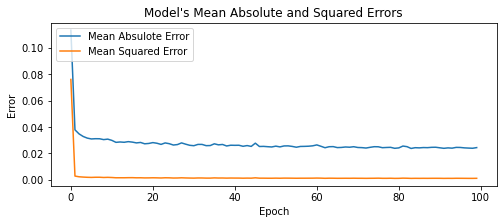

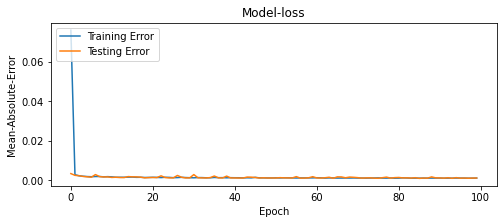

In [25]:
# Plotting 
#list all the data in history
print(history.history.keys())
#summarize history for accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['MAE'])
plt.plot(history.history['MSE'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Error', 'Mean Squared Error'],loc = 'upper left')
plt.show()

#summarize history for loss
plt.figure(figsize=(8,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

## Predictions
    Predicting the TEY(Turbine Energy Yield) using all the other features.

In [26]:
# generating predictions for test data
y_predict = model.predict(X_test) 

# creating table with test price & predicted price for test
predictions = pd.DataFrame(X_test)
predictions['Actual TEY'] = y_test
predictions['Predicted TEY'] = y_predict
print(predictions.shape)
predictions.drop(['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],
                                          axis =1 , inplace = True)
predictions.head(10)

94/94 [==============================] - 0s 568us/step
(3008, 12)


,Actual TEY,Predicted TEY
13312,0.017154,0.038646
12627,-1.409324,-1.421900
6393,-0.029595,-0.002819
4990,-0.025173,-0.013386
12462,-1.479448,-1.490777
7405,-1.318353,-1.280891
10993,-0.026436,-0.018978
9488,-0.329042,-0.340596
14201,1.593988,1.641546
9757,1.748133,1.778022


### Visualizing the Relationship between Actual and Predicted values of TEY

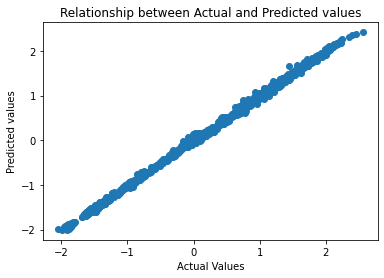

In [27]:
plt.scatter(predictions['Actual TEY'], predictions['Predicted TEY'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Relationship between Actual and Predicted values")
plt.show()

### Conclusion
    Hence, the feature TEY (Turbine Energy Yield) has been predicted based on the other features.